**Question-1:**
1. Given an ECG signal “original_ECG.mat”, compute its DFT. (Sampling frequency of the signal is 1000 Hz.)
- (a) Plot its magnitude and phase spectrum.
- (b) Find out the magnitude in dB and phase angle in degrees at frequency 30 Hz. Display the values.

    Steps to be followed:
    
    1. Import the necessary libraries like numpy, scipy, and matplotlib.
    2. Read the original speech signal "science.wav" using the scipy.io.wavfile.read() function.
    3. Calculate the length of the signal using the len() function.
    4. Generate Gaussian noise using the numpy.random.randn() function.
    5. Add the noise to the original signal at different signal-to-noise ratios (SNRs) of 10 dB, 0 dB, and -10 dB using the numpy.power() function.
    6. Plot the original signal and the noisy signals using the matplotlib.pyplot.plot() function.
    7. Compute the power spectral density (PSD) of the noisy signals using the scipy.signal.periodogram() function.
    8. Estimate the PSD of the noise using the np.mean() function.
    9. Compute the Wiener filter using the estimated PSDs and the scipy.signal.wiener() function.
    10. Apply the Wiener filter to the noisy signals to obtain the filtered signals.
    11. Evaluate the SNR of the filtered signals using the numpy.mean() and numpy.var() functions.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cmath
import IPython.display as ipd

In [2]:
# Loading .mat file
ecg_signal = scipy.io.loadmat('original_ECG.mat')

In [3]:
ecg_signal

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 13 11:22:04 2015',
 '__version__': '1.0',
 '__globals__': [],
 'original': array([[39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
         58.8477386 , 62.91896577]])}

In [4]:
# Access data as NumPy array
signal = ecg_signal['original'].flatten()

In [5]:
print("Shape of given data is: ",signal.shape)
print(f"Number of Data points are: {len(signal)}")

Shape of given data is:  (10000,)
Number of Data points are: 10000


In [6]:
# see 10 values
signal[:10]

array([39.60475775, 40.07076881, 40.5922544 , 41.16802142, 41.79503607,
       42.46928097, 43.18645728, 43.94249152, 44.73384395, 45.55764234])

In [7]:
# write a function to compute DFT
def find_DFT(signal):
    N = len(signal)
    output = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            output[k] = output[k]+signal[n]*np.exp(-2j*np.pi*n*k/N)
    return output

In [8]:
# Compute the DFT of the signal
import time
start_time =- time.time()
dft_signal = np.fft.fft(signal)
end_time = time.time()
print(f"Time taken: {end_time-start_time}")

Time taken: 3358068322.270848


In [9]:
# import time
# start_time = time.time()
# dft_signal = find_DFT(arr_data)
# end_time=time.time()
# print("Total time taken to find dft is: ",end_time-start_time," sec")

In [10]:
signal.shape

(10000,)

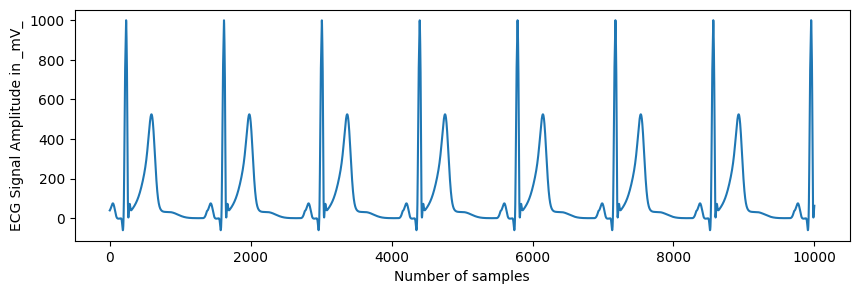

In [11]:
plt.figure(figsize=(10,3))
plt.plot(signal)
plt.xlabel("Number of samples")
plt.ylabel("ECG Signal Amplitude in _mV_")
plt.show()

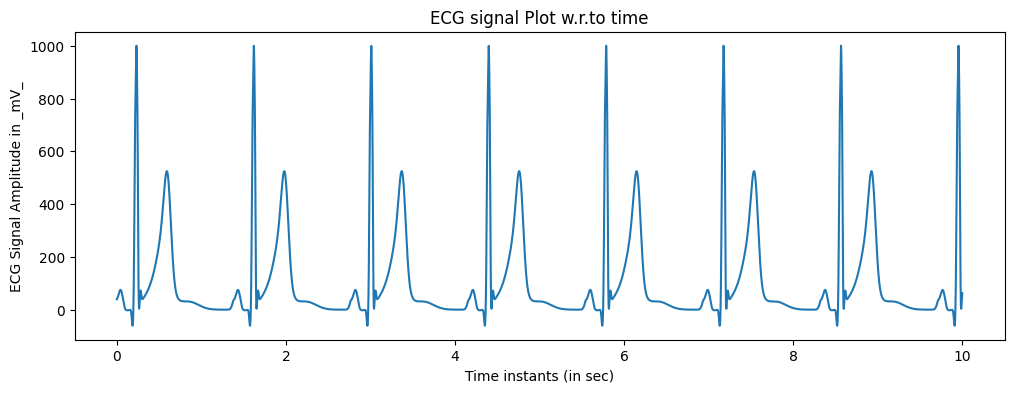

In [12]:
fs = 1000  #sampling_freq
time_ = np.arange(len(signal))
time_stamp = time_/fs
plt.figure(figsize=(12,4))
plt.plot(time_stamp,signal)
plt.xlabel("Time instants (in sec)")
plt.ylabel("ECG Signal Amplitude in _mV_")
plt.title("ECG signal Plot w.r.to time")
plt.show()

In [13]:
dft_signal[:10]

array([1051051.42082599     +0.j        ,
         12232.69647406  -4801.70190819j,
         12362.15439958 -10218.08945944j,
         12620.69947601 -17149.44369972j,
         13114.98642028 -27415.87112016j,
         14166.52395222 -45974.17569333j,
         17218.40063517 -94132.15256557j,
         53049.75519799-618936.16108845j,
         -1671.72970902+167844.133529j  ,
          3600.10366575 +80711.63375168j])

In [14]:
# Normalize it
dft_signal /= len(dft_signal)

In [15]:
dft_signal[:5]

array([105.10514208+0.j        ,   1.22326965-0.48017019j,
         1.23621544-1.02180895j,   1.26206995-1.71494437j,
         1.31149864-2.74158711j])

In [16]:
dft_signal.shape

(10000,)

(a) Plot its magnitude and phase spectrum.

In [17]:
ts = len(signal)/fs # time period
frequencies = time_/ts

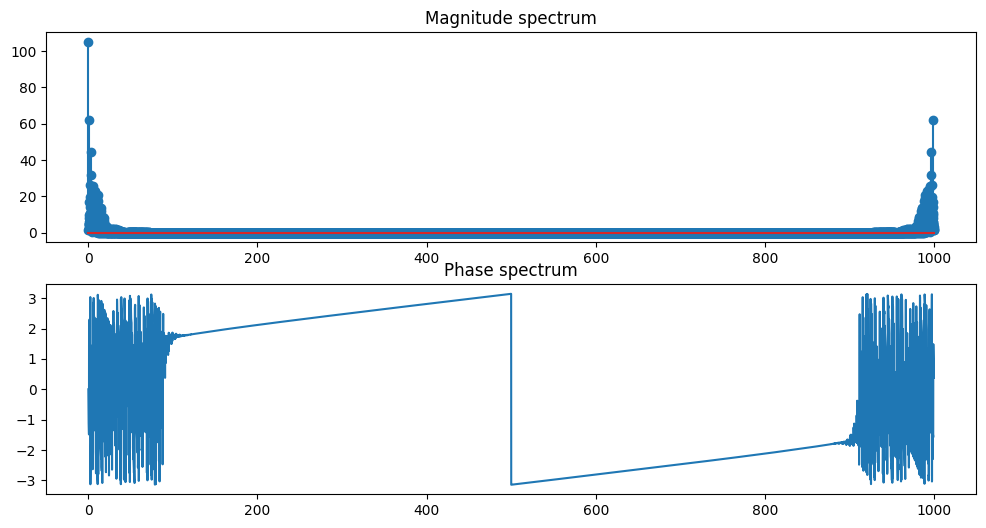

In [18]:
# plot magnitude and phase spectrum
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.stem(frequencies,np.abs(dft_signal))
plt.title('Magnitude spectrum')
plt.subplot(212)
plt.plot(frequencies,np.angle(dft_signal))
plt.title('Phase spectrum')
plt.show()

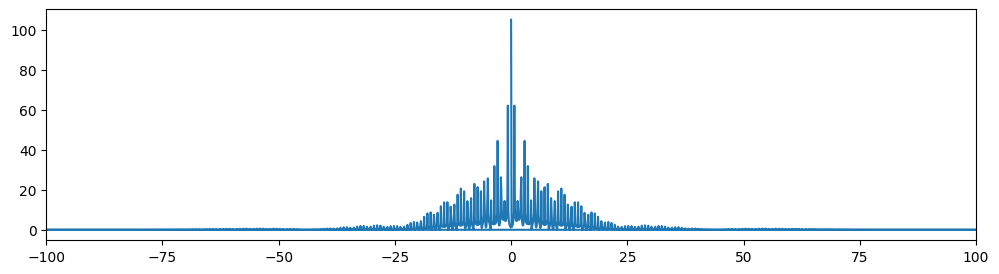

In [19]:
# Compute the frequency axis
freq = np.fft.fftfreq(len(signal), 1/fs)
# magnitude plot
plt.figure(figsize=(12,3))
plt.plot(freq, np.abs(dft_signal))
plt.xlim(-100,100);

<StemContainer object of 3 artists>

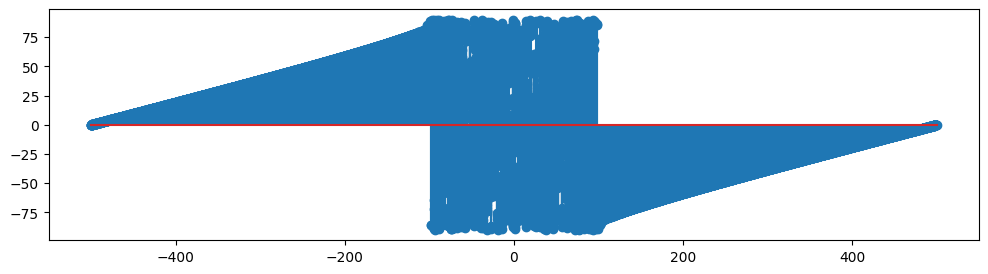

In [20]:
phase = [(np.arctan(ele.imag/ele.real)*180)/np.pi for ele in dft_signal]
plt.figure(figsize = (12,3))
plt.stem(freq,phase)
# plt.xlim(-300,300);

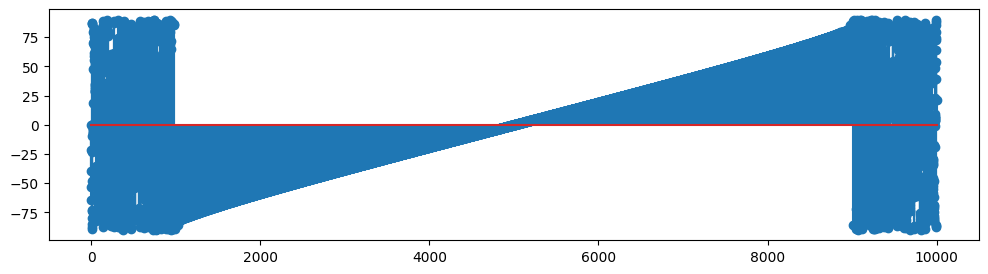

In [21]:
plt.figure(figsize = (12,3))
plt.stem(phase);

In [22]:
freq[-1:-20:-1]

array([-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. , -1.1,
       -1.2, -1.3, -1.4, -1.5, -1.6, -1.7, -1.8, -1.9])

(b) Find out the magnitude in dB and phase angle in degrees at frequency 30 Hz. Display the values.

In [23]:
freq[490:510], freq[300]

(array([49. , 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50. ,
        50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9]),
 30.0)

In [24]:
import math
mag_db = 20*math.log10(np.abs(dft_signal)[300])
print(f"Magnitude at 30 Hz frequency is: {mag_db}dB")
angle_30 = phase[300]
print(f"Phase Angle at 30 Hz frequency is: {angle_30}dB")

Magnitude at 30 Hz frequency is: -11.969348565479535dB
Phase Angle at 30 Hz frequency is: -41.82373688297548dB


In [25]:
np.abs(dft_signal[300])

0.2520766227926647

**Question-2**

2. The original speech signal is given as “science.wav”. The sampling rate is 32 Khz. 
- (a) Add 10 dB, 0 dB and -10 dB Gaussian noise to it. Plot the signals 
- (b) Perform  Weiner  filtering  to  eliminate  the  noise  from  the  corrupted  speech signals.
* Evaluate the SNR value for the filtered speech signals.

In [26]:
# import .wav file
from scipy.io import wavfile

In [27]:
from IPython.display import Audio
wn = Audio('science.wav', autoplay=True)
display(wn)

In [28]:
sampling_freq , audio = wavfile.read("science.wav")

# We can also use "librosa" library to deal with Audio Signal.
# Load the original signal from a file
import librosa
signal, fs = librosa.load('science.wav', sr=32000)

In [29]:
len(signal),fs

(90267, 32000)

In [30]:
print(f"Length of audio signal or no. of samples is: {len(audio)}" )
print(f"Sampling Frequency of the audio signal is: {sampling_freq} Hz")

Length of audio signal or no. of samples is: 90267
Sampling Frequency of the audio signal is: 32000 Hz


In [31]:
(90267/32000)/60

0.047014062499999995

In [32]:
length = audio.shape[0] / sampling_freq
print(f"length = {length}s")

length = 2.82084375s


In [33]:
audio.shape

(90267,)

In [34]:
np.max(audio),np.max(np.abs(audio)),np.min(audio)

(13962, 16768, -16768)

In [35]:
# Normalize the Amplitude of Audio Signal to values between -1 nad 1
audio_ = audio/np.max(np.abs(audio))
audio_[:5]

array([-5.96374046e-05,  5.96374046e-05,  1.19274809e-04, -5.36736641e-04,
        1.19274809e-03])

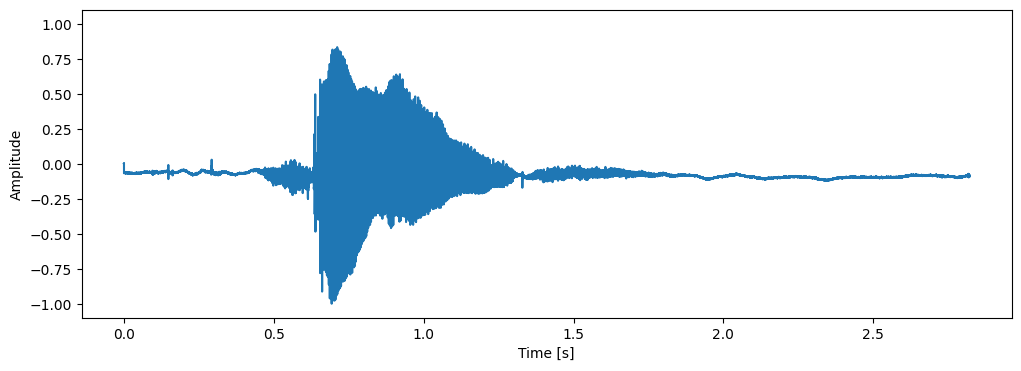

In [36]:
time = np.linspace(0., length, audio_.shape[0])
plt.figure(figsize = (12,4))
plt.plot(time, audio_)
plt.ylim(-1.1,1.1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

**(a) Add 10 dB, 0 dB and -10 dB Gaussian noise to it. Plot the signals**

Adding 10dB Gaussian noise to a signal means that the power of the noise in the signal is 10 dB lower than the power of the original signal. 

In [37]:
# Standard Deviation of signal
std_signal = np.std(audio_)
# Mean of Audio Signal
mean_signal = np.mean(audio_)

In [38]:
print(f"Standard Deviation of Audio Signal is: {std_signal}")
print(f"Mean of Audio Signal is: {mean_signal}")

Standard Deviation of Audio Signal is: 0.10339736549024396
Mean of Audio Signal is: -0.08578162628244435


In [39]:
# 10 db Noise signal
std_noise_10db = std_signal / np.power(10,10/10)
print(f"Std. dev. of 10 dB noise is: {std_noise_10db}")

# 0db Noise Signal
std_noise_0db = std_signal/np.power(10,0/10)
print(f"Std. dev. of 0 dB noise is: {std_noise_0db}")

# minus10 db
std_noise_minus10db = std_signal/np.power(10,-10/10)
print(f"Std. dev. of minus_10 dB noise is: {std_noise_minus10db}")

Std. dev. of 10 dB noise is: 0.010339736549024396
Std. dev. of 0 dB noise is: 0.10339736549024396
Std. dev. of minus_10 dB noise is: 1.0339736549024396


In [40]:
# Calculate the length of the audio signal
length = len(audio_)

# Generate Gaussian noise
# Generate 3 different levels of Gaussian noise
noise_10dB = np.random.normal(0, std_noise_10db, len(audio_))
noise_0dB = np.random.normal(0, std_noise_0db, len(audio_))
noise_minus10dB = np.random.normal(0, std_noise_minus10db , len(audio_))

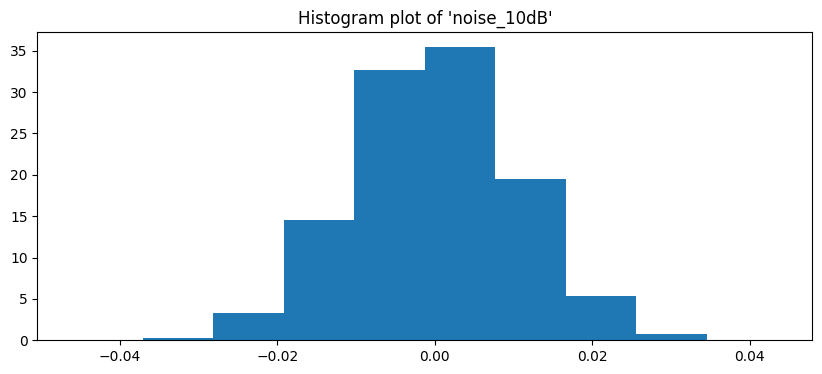

In [41]:
# Histogram plot for 10 dB Noise Signal
plt.figure(figsize=(10,4))
plt.hist(noise_10dB,density=True)
plt.title("Histogram plot of 'noise_10dB'")
plt.show();

In [42]:
# Add noise to the original signal at different SNRs
'''
The formula for adding Gaussian noise to the original signal at a specific signal-to-noise ratio (SNR) is given as:

noisy_signal = signal + np.power(10, SNR/20) * noise

- signal is the original audio signal
- SNR is the desired signal-to-noise ratio in decibels (dB)
- noise is the Gaussian noise that will be added to the original audio signal
- np.power(10, SNR/10) is a conversion factor that converts the SNR from a decibel scale to a linear scale.
'''
# Add the noise to the signal to generate 3 different noisy signals

noisy_signal_10dB = audio_ + np.power(10, 10/20) * noise_10dB
noisy_signal_0dB = audio_ + np.power(10, 0/20) * noise_0dB
noisy_signal_minus10dB = audio_ + np.power(10, -10/20) * noise_minus10dB

In [43]:
# calculate the power of the noise
power_noise_10dB = np.mean((noisy_signal_10dB - audio_)**2)
power_noise_0dB = np.mean((noisy_signal_0dB - audio_)**2)
power_noise_minus10dB = np.mean((noisy_signal_minus10dB - audio_)**2)


# Calculate the power of the original signal
power_signal = np.mean(audio_**2)

In [44]:
# 10*math.log10(power_signal/power_noise_minus10dB)

In [45]:
20*math.log10(std_signal/np.std(np.power(10, -10/20) * noise_minus10dB))

-10.000667676586957

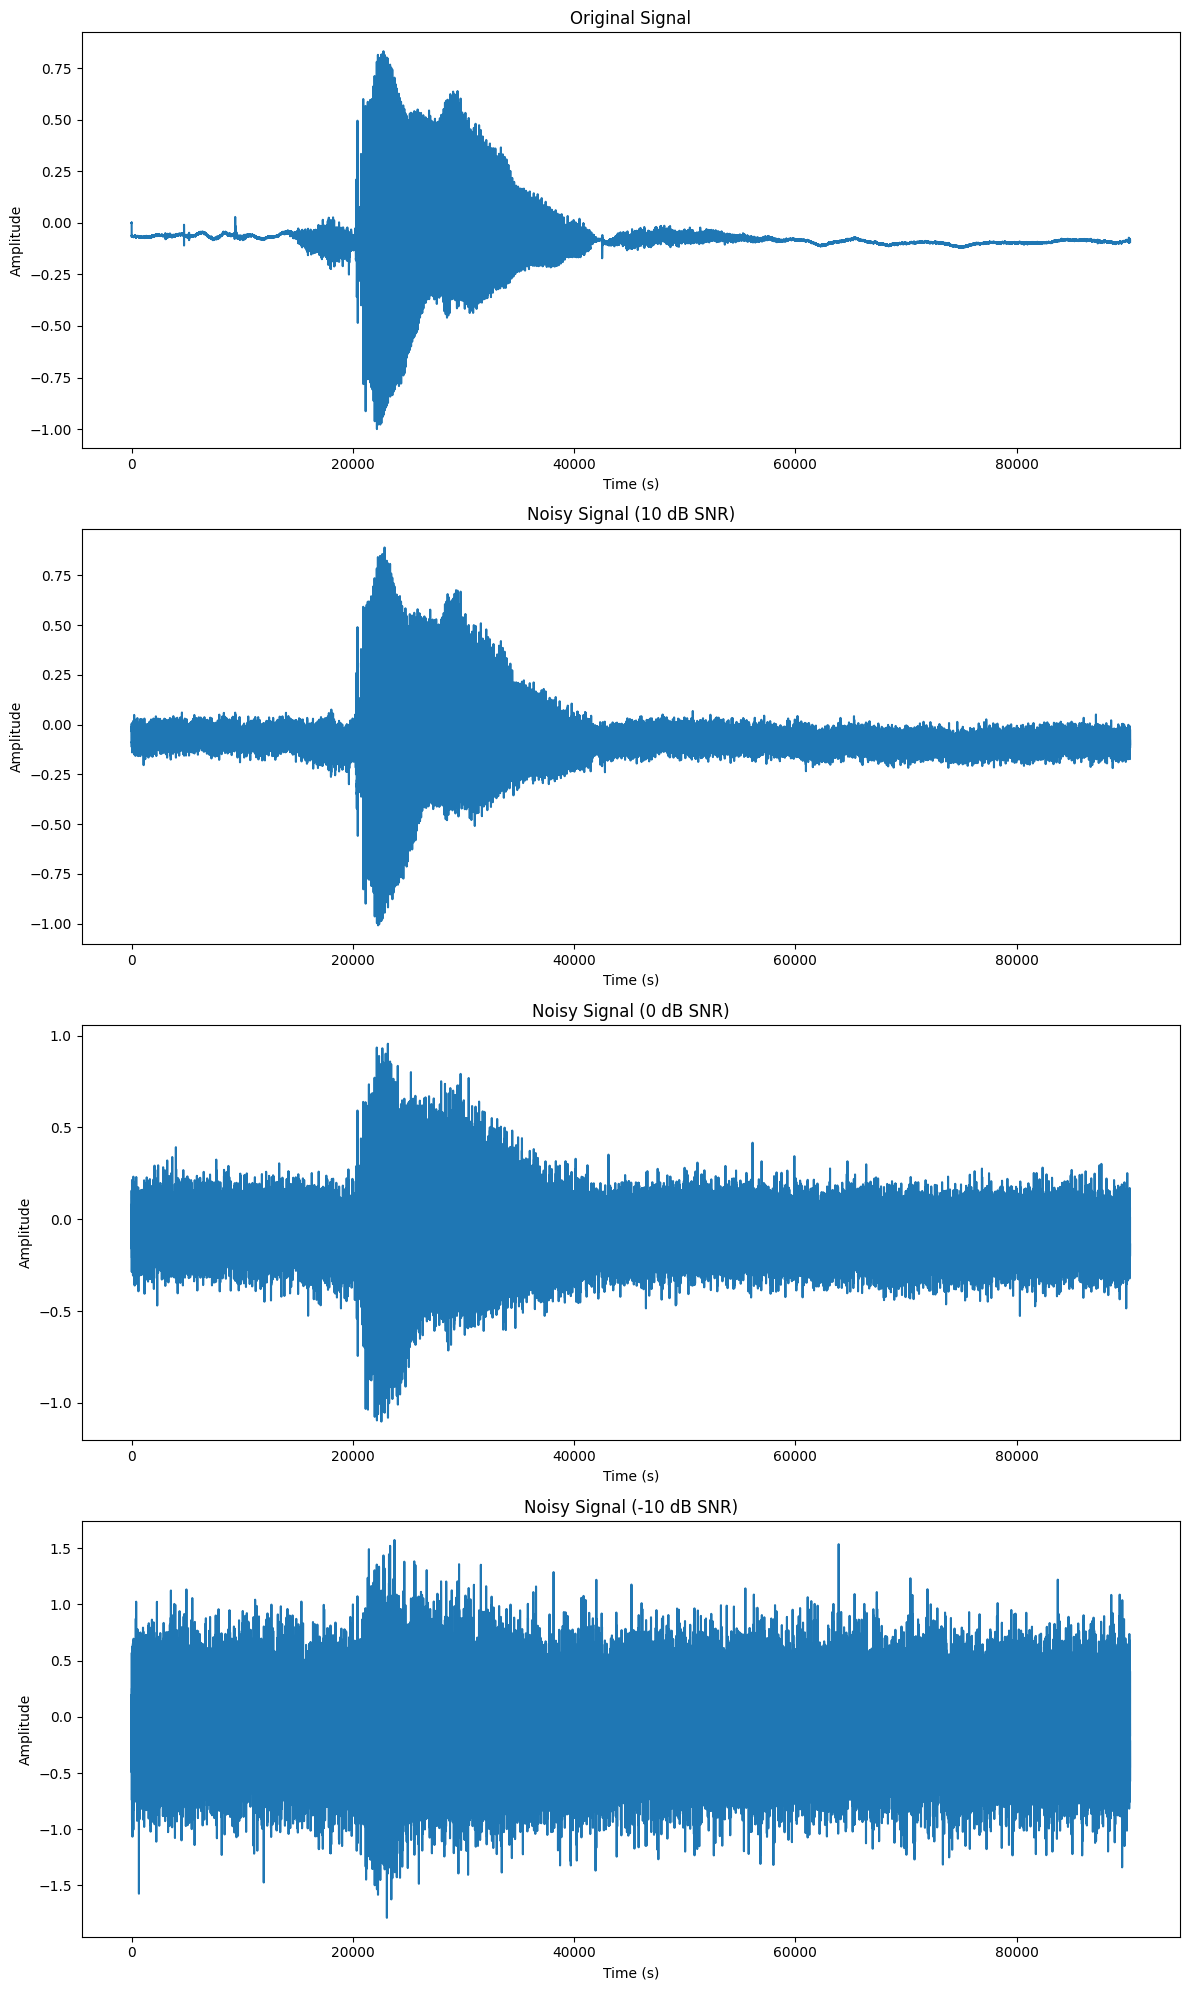

In [46]:
# Plot the original audio signal and the noisy audio signals
plt.figure(figsize=(12,20))
plt.subplot(411)
time = np.linspace(0., length, audio_.shape[0])
# time = np.arange(len(signal)) / sampling_freq
plt.plot(time,audio_)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.subplots_adjust(hspace=0.3) # adjust spacing between subplots

plt.subplot(412)
plt.plot(time,noisy_signal_10dB)
plt.title("Noisy Signal (10 dB SNR)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(time,noisy_signal_0dB)
plt.title("Noisy Signal (0 dB SNR)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(414)
plt.plot(time,noisy_signal_minus10dB)
plt.title("Noisy Signal (-10 dB SNR)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

**(b) Perform  Weiner  filtering  to  eliminate  the  noise  from  the  corrupted  speech 
signals. Evaluate the SNR value for the filtered speech signals.**

In [47]:
from scipy.signal import periodogram, wiener

In [48]:
# Perform Weiner filtering to eliminate the noise from the corrupted speech signals
filtered_signal_10dB = wiener(noisy_signal_10dB, mysize=128,)
filtered_signal_0dB = wiener(noisy_signal_0dB, mysize=128)
filtered_signal_minus10dB = wiener(noisy_signal_minus10dB, mysize=128)

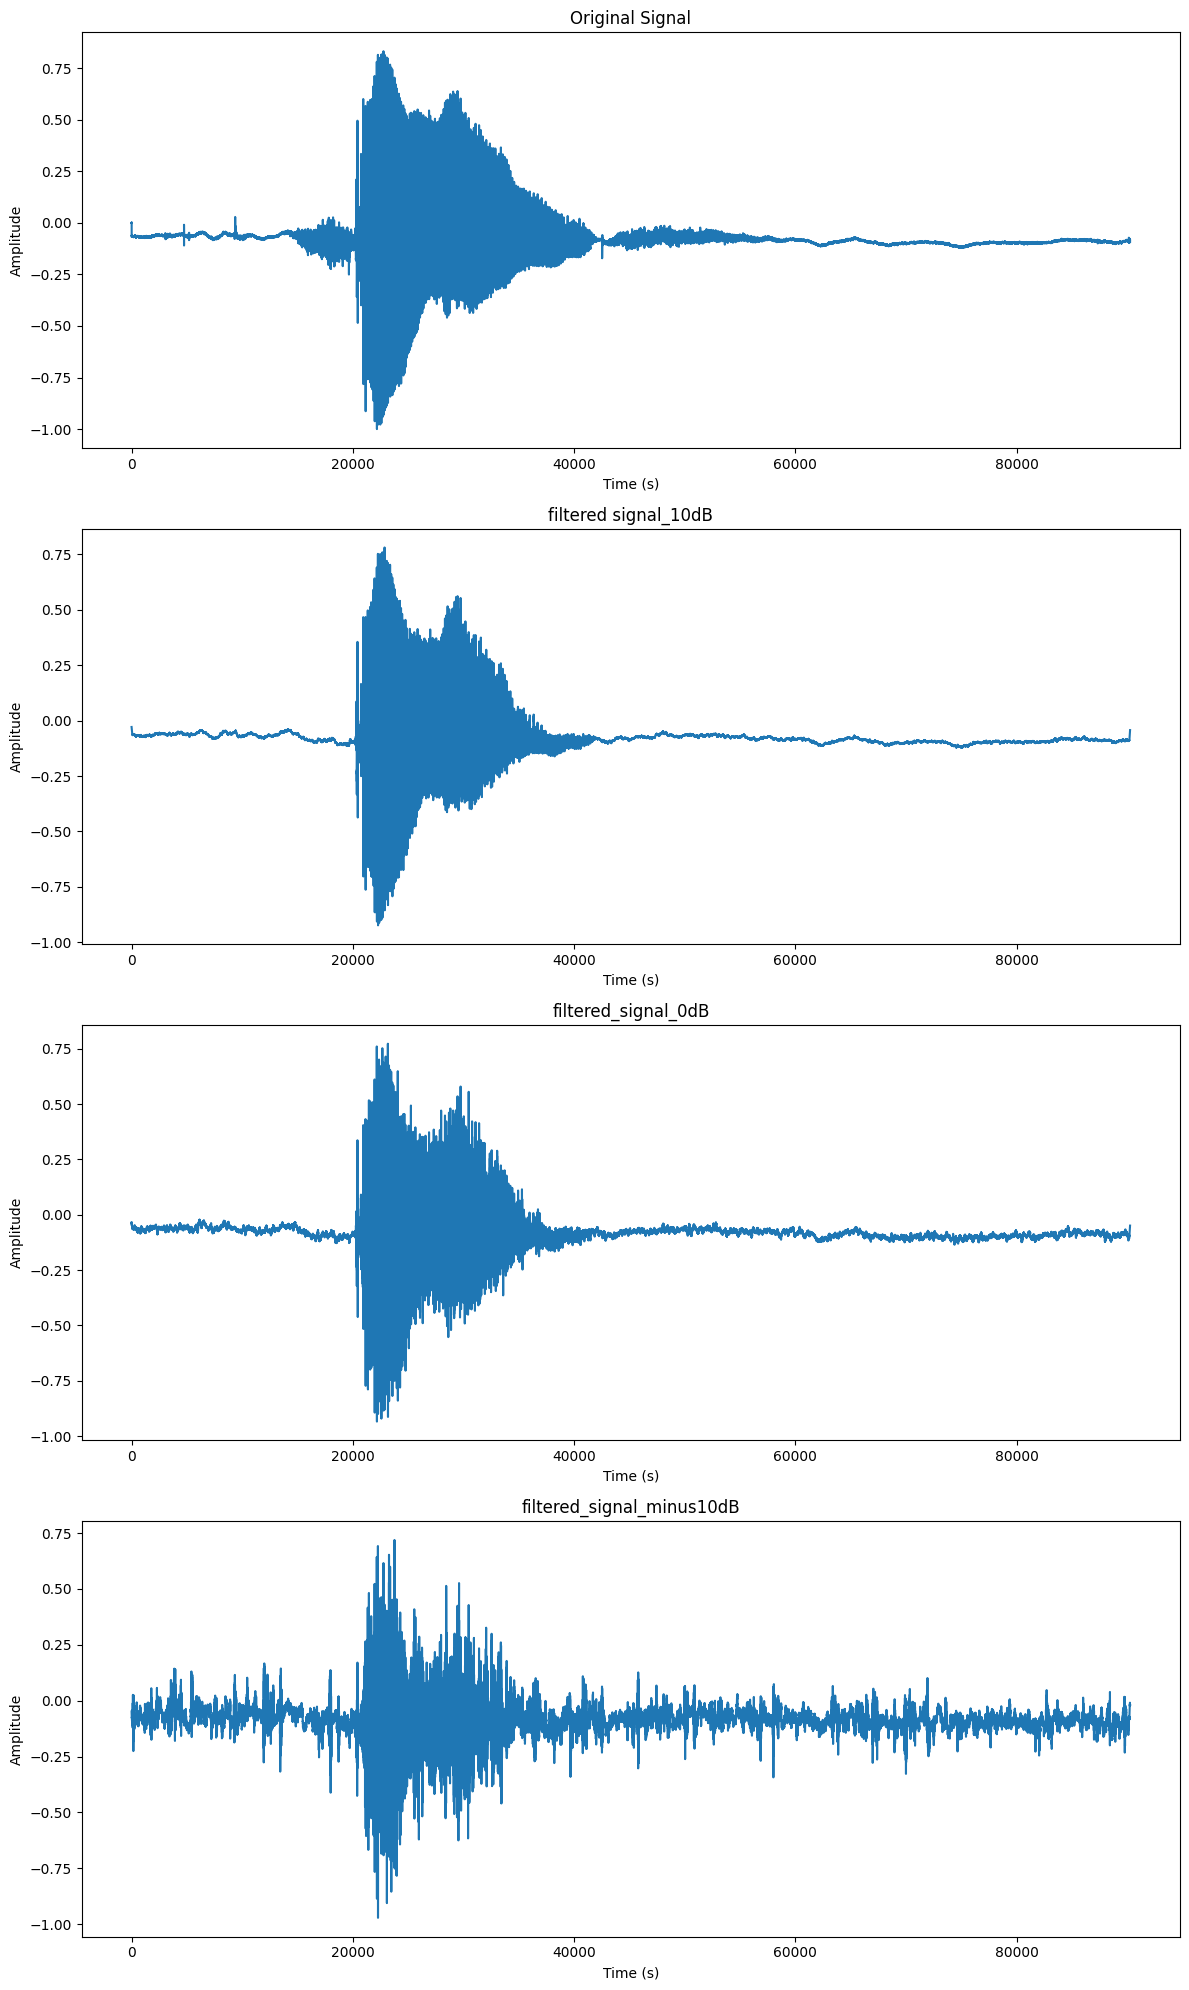

In [49]:
# Plot the original audio signal and the noisy audio signals
plt.figure(figsize=(12,20))
plt.subplot(411)
time = np.linspace(0., length, audio_.shape[0])
# time = np.arange(len(signal)) / sampling_freq
plt.plot(time,audio_)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.subplots_adjust(hspace=0.3) # adjust spacing between subplots

plt.subplot(412)
plt.plot(time,filtered_signal_10dB)
plt.title("filtered signal_10dB")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(time,filtered_signal_0dB)
plt.title("filtered_signal_0dB")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(414)
plt.plot(time,filtered_signal_minus10dB)
plt.title("filtered_signal_minus10dB")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [50]:

# Calculate the SNR values for the filtered speech signals
signal_power = np.mean((filtered_signal_10dB-np.mean(filtered_signal_10dB)) ** 2)
noise_power = np.mean(((filtered_signal_10dB - audio_)-np.mean(filtered_signal_10dB - audio_)) ** 2)
snr_10dB = 10 * np.log10(signal_power / noise_power)

signal_power = np.mean((filtered_signal_0dB-np.mean(filtered_signal_0dB)) ** 2)
noise_power = np.mean(((filtered_signal_0dB - audio_)-np.mean(filtered_signal_0dB - audio_)) ** 2)
snr_0dB = 10 * np.log10(signal_power / noise_power)

signal_power = np.mean((filtered_signal_minus10dB-np.mean(filtered_signal_minus10dB)) ** 2)
noise_power = np.mean(((filtered_signal_minus10dB - audio_)-np.mean(filtered_signal_minus10dB - audio_)) ** 2)
snr_minus10dB = 10 * np.log10(signal_power / noise_power)

print('SNR (10 dB):', snr_10dB)
print('SNR (0 dB):', snr_0dB)
print('SNR (-10 dB):', snr_minus10dB)

SNR (10 dB): 8.942147883673643
SNR (0 dB): 4.583888281500923
SNR (-10 dB): -2.5721968785569356


END